Support Vector Machines (SVM)
------

<center><img src="images/support_svm.png" width="650"/></center>

Support Vector Machines (SVM) are like resolving roommate conflict
------
<center><img src="images/roommate.jpg" width="900"/></center>

When I was a student in SF, I had to share a room with a roommate. 

It was huge room and our stuff was all over the floor. We too lazy to pick the stuff up. But we wanted seperation of items.

Our solution was to separate our stuff but all we had was a straight room divider.

We could the divider anywhere, we decided it was most fair to put in the middle of our stuff.

<center><img src="images/panel_divider.jpg" width="700"/></center>

Quick Review
-----

- Supervised Classifiers

- Train/Test Split

- Bias-Variance Trade-offs

- Regularization

- Evaluation metrics

By The End Of This Session You Should Be Able To:
----

- Explain Support Vector Machines (SVM) in your own words.

- Fit and interpret a SVM to data.

- Find the support vectors for a SVM.

- Explain the concept of decision boundaries in your own words.

- Explain the Kernel Trick in your own words.

Define SVM
-----

A supervised Machine Learning technique that discovers how to separate groups.

In [153]:
reset -fs

In [154]:
# Imports for plotting
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_context("poster")

%matplotlib inline

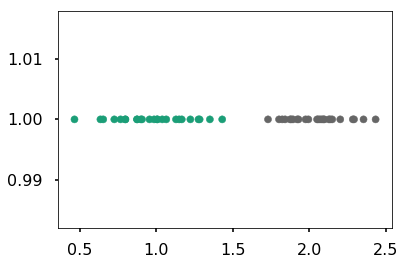

In [155]:
# 1 dimensional data with 2 classes

from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.2)
plt.scatter(X[:, 0], y=np.ones(X.shape[0]), c=y, s=50, cmap='Dark2');

SVMs are Discriminative (in a good way)
----

<center><img src="images/discriminative.png" width="300"/></center>

Find a boundary that divides the classes from each other (training).

Use that boundary to predict class membership for new data  (inference).

vs. Generative Algorithm
-----

<center><img src="images/generative.png" width="300"/></center>

Learn a probabilistic model of the distribution for each class (training).

Use that distribution model to predict labels for new points (inference).

For example, Naive Bayes Classification

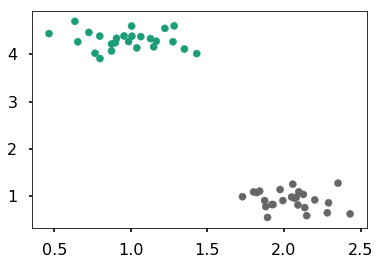

In [156]:
# Let's jump to 2 dimensions
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2');

Check for understanding
-----

How would you separate groups in 2 dimensions?

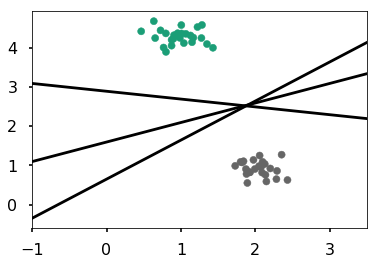

In [157]:
# Many linear bounds allow for perfect separation

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Decision boundaries scale with dimensionality
------

A point in 1 dimension.

A line (or a curve) in 2 dimensions.

A `________` in higher dimensions.

A __hyperplane (or a manifold)__ in higher dimensions.

SVM: The "Margin"
-----

Rather than drawing a zero-width line between the classes,  
draw a margin around each line of some width.

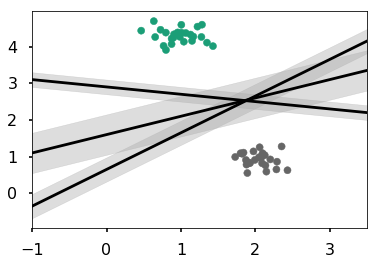

In [158]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, 
                     edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

SVM: Maximize The "Margin"
-----

<center><img src="images/max_margin.png" width="700"/></center>

The width is up to the nearest point of each class.

<center><img src="images/small_margin.gif" width="800"/></center>

SVM: Find the Support Vectors
-----

<center><img src="images/margin.png" width="500"/></center>

A SVM solution only depends on the support points. __Not__ on the whole data set.

Check for understanding
------

What did one support vector say to another? 

I feel so marginalized. 😹😹😹

(re)Define SVM
-----

~~A Machine Learning technique that discovers how to separate classes of data.~~

__Find the optimal hyperplane that maximums the margin between support vectors__.

Case Study: What is in the box?
-------

<center><img src="images/Mystery_Box.jpg" width="700"/></center>

In [159]:
# Size of the boxes
X = np.array([[8, 12],
     [9, 10],
     [9, 15],
     [20, 19],
     [22, 17],
     [19, 16]])
 
# What is in the box
y = ['orange', 'orange', 'orange',
     'basketball', 'basketball', 'basketball']

Always visually inspect the data first
------

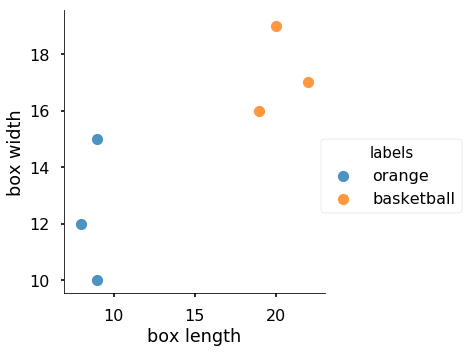

In [160]:
# Munge data into Pandas dataframe for easier ploting
df = pd.DataFrame(X, columns=['box length', 'box width']); df['labels'] = y

item_plot = sns.lmplot(data=df, x='box length', y='box width',
                      fit_reg=False, hue="labels", legend=True);

Fit SVM
-----

In [161]:
from sklearn import svm

In [162]:
# Define an instance of a SVM classifer
clf = svm.SVC()

In [163]:
# Estimate the classifer for our data
clf.fit(X, y);  

After being fitted, the model can then be used to predict new values:

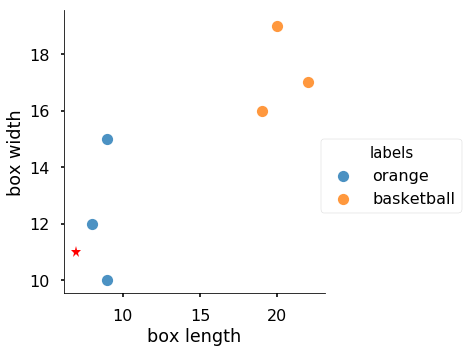

In [164]:
value = [7, 11]  # New data point #1
# value = [23, 19] # New data point #2 
# value = [16, 14]   # New data point #3

# Plot 
new_item_plot = sns.lmplot(data=df, x='box length', y='box width', fit_reg=False, hue="labels", legend=True);
new_item_plot.ax.plot(value[0], value[1], color='red', marker='*');

# Predict
# clf.predict([value]).item()

Check for understanding
-------

What are the support vectors in this example?

In [165]:
# Get support vectors
clf.support_vectors_

array([[20., 19.],
       [22., 17.],
       [19., 16.],
       [ 8., 12.],
       [ 9., 10.],
       [ 9., 15.]])

Reference: http://scikit-learn.org/stable/modules/svm.html

Case Study: Everyone's favorite… The Iris Dataset
------

<center><img src="images/iris.jpg" width="700"/></center>

In [166]:
from sklearn import datasets

iris = datasets.load_iris()

In [167]:
X = iris.data[:, :2] # Use only the first two features for easier plotting
y = iris.target

In [168]:
# Define & fit model
clf = svm.SVC().fit(X, y)
predicted = clf.predict(iris.data[:, :2])

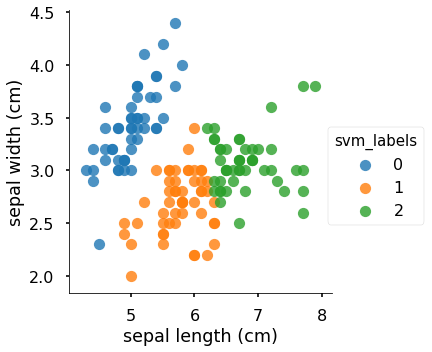

In [175]:
# The ground truth
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['true_labels'] = iris.target
df['svm_labels'] = predicted

svm_plot = sns.lmplot(data=df, x='sepal length (cm)', y='sepal width (cm)',
                      fit_reg=False, legend=True,
#                       hue="true_labels"
                      hue="svm_labels"
                     );

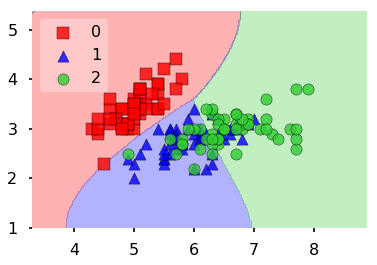

In [172]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=X, 
                       y=y,
                      #y=predicted, 
                      clf=clf,
                      legend=2);

Check for understanding
-------

What are the support vectors in this example?

In [176]:
print(f"The number of support vectors: {clf.support_vectors_.shape[0]}")
print()
print('Examples of support vectors:')
print(*clf.support_vectors_[:5])

The number of support vectors: 87

Examples of support vectors:
[4.9 3. ] [4.8 3. ] [5.8 4. ] [5.7 3.8] [5.4 3.4]


SVM Formalism
-----

<center><img src="images/formalism_2.png" width="500"/></center>

<center><img src="images/formalism_3.png" width="500"/></center>

SVM is a convex optimization problem.

Kernel Trick: <br><br> The one weird thing that makes linear classifiers fit better
-----

<center><img src="images/flatland_cover.png" width="700"/></center>

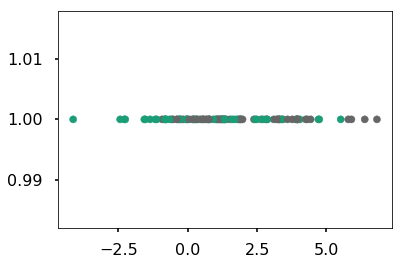

In [177]:
# Back to Flatland
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=2)
plt.scatter(X[:, 0], y=np.ones(X.shape[0]), c=y, s=50, cmap='Dark2');

"Lift" the data from 1 to 2 dimensions
-----
<center><img src="images/kernel.png" width="700"/></center>

What is a Kernel?
------

A Kernel maps lower dimensional data into higher dimensions.

Hopefully, then the data is __linearly separable__ in higher dimensions.

<center><img src="images/feature_space.png" width="1200"/></center>

φ is the Greek letter "Phi"

From 2 to 3 dimensions
-----

<center><img src="images/feature_2.png" width="1000"/></center>

Kernels are often nonlinear!

Question for Thought
-----

Kernels are an useful tool for Data Scientists - make the data more complex but keep the model simple.

What are the disadvantages of a kernel?

- Selecting a "good enough" kernel can be hard.
- Since kernels are often nonlinear and involve higher dimensional scaling, there can be high computational cost.

When should you use SVMs?
-----

+ Handles class imbalances because model performance only depends on Support Vectors.

+ Fast at inference step because of vectorization.

+ Can be extended to: 
    - [Regression](https://www.mathworks.com/help/stats/understanding-support-vector-machine-regression.html?requestedDomain=true)
    - [Anomaly Detection](http://activisiongamescience.github.io/2015/12/23/Unsupervised-Anomaly-Detection-SOD-vs-One-class-SVM/)
    - [Learning-to-rank](https://en.wikipedia.org/wiki/Learning_to_rank)

When should you NOT use SVMs?
-----

- Need state-of-the-art performance (Use Deep Learning).

- Slow to train. 

- Sensitive to regularization and kernel choices.

Summary
------

- SVM are only a supervised learning (need labeled data).



- Support Vector Machines (SVM) are a discriminative machine learning algorithm (learn a decision bound).

- SVM finds the optimal hyperplane that maximums the margin between support vectors.

- The Kernel Trick maps lower dimensional data into higher dimensions, thus allowing a hyperplane to be found.

Further Study
-----

- Work through a more complex example. [Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

- Dig into the math of SVM. [The Elements of Statistical Learning](http://www.springer.com/us/book/9780387848570) & [svm-tutorial.com](https://www.svm-tutorial.com/)

- Implement your own SVM classifier. [Example](http://tullo.ch/articles/svm-py/)

- Explore kernels. [Learning with Kernels: Support Vector Machines, Regularization, Optimization, and Beyond](https://www.amazon.com/Learning-Kernels-Regularization-Optimization-Computation/dp/0262194759)

- Hard vs. Soft margins

Questions?
------

<center><img src="images/mug.png" width="700"/></center>

Bonus Material
----

In [178]:
# Evaluation of model
from sklearn.metrics import confusion_matrix
from pprint_cm import pprint_cm

pprint_cm(cm=confusion_matrix(predicted, iris.target), 
         labels=iris.target_names)

                   setosa versicolor  virginica 
        setosa       50.0        0.0        0.0 
    versicolor        0.0       38.0       14.0 
     virginica        0.0       12.0       36.0 


Check for understanding
------

How well does our model do?

Where does it make mistakes?

<br>
<br> 
<br>

----